In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\hrish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hrish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hrish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hrish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
df = pd.read_csv(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Airbag data.csv')
df.drop(['Unnamed: 0'], axis =1, inplace = True)
df.head()

,Acc_x,Topple_rate,Roll_rate,Acc_y,Accident,Airbag
0,-128.533346,13.765434,41.482979,11.257175,1,1
1,10.746493,19.325247,27.000041,11.081004,0,0
2,68.857225,16.352830,41.796872,12.836890,0,0
3,-43.260996,4.795048,16.012463,17.343162,0,0
4,-85.755633,18.372263,9.304257,19.913530,0,0


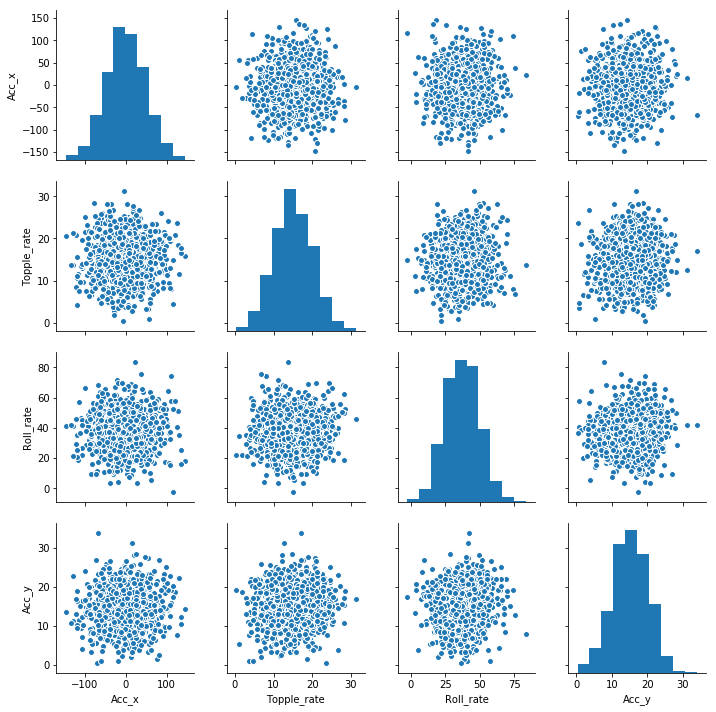

In [3]:
sns.pairplot(df.drop(['Airbag','Accident'], axis=1))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.loc['0':,'Acc_x':'Acc_y']
y = df['Airbag']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Logistic Model

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr_model = LogisticRegression()

In [9]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr_model.intercept_

array([-5.69240068])

In [11]:
lr_model.coef_

array([[-0.00107509,  0.12628565,  0.00853986,  0.18889205]])

In [12]:
predict = lr_model.predict(X_test)

In [13]:
y_test.index

Int64Index([545, 298, 109, 837, 194, 605, 246, 693, 802, 406,
            ...
            620, 550,  27, 720, 945, 847, 682, 884, 325, 482],
           dtype='int64', length=300)

In [14]:
count = 0

for i in range(y_test.shape[0]):
    
    if (y_test[y_test.index[i]] == predict[i]):
        count = count+1
    else: continue
        
count

238

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
accident = []

for i in y_test.index:
    
    accident.append(df['Accident'][i])

In [17]:
airbag = []

for i in y_test.index:
    
    airbag.append(df['Airbag'][i])

In [18]:
print("Actual Data")
print('\n',confusion_matrix(accident, airbag))
print('\n', classification_report(accident, airbag),'\n')

Actual Data

 [[177  15]
 [ 15  93]]

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       192
           1       0.86      0.86      0.86       108

    accuracy                           0.90       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300
 



In [19]:
print('Logistic Model')
print('\n',confusion_matrix(accident, predict))
print('\n', classification_report(accident, predict))

Logistic Model

 [[179  13]
 [ 31  77]]

               precision    recall  f1-score   support

           0       0.85      0.93      0.89       192
           1       0.86      0.71      0.78       108

    accuracy                           0.85       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300



In [20]:
'''fig2, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

axis.plot(X_test,y_test, 'g', label = 'Actual', linewidth = 3, marker ='*', markersize=3)

axis.plot(X_test,predict,'p', label = 'Predictions', linestyle = '--', alpha =0.8, markersize=3)


axis.legend(loc = (0.1,0.7))

plt.tight_layout()'''

"fig2, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))\n\naxis.plot(X_test,y_test, 'g', label = 'Actual', linewidth = 3, marker ='*', markersize=3)\n\naxis.plot(X_test,predict,'p', label = 'Predictions', linestyle = '--', alpha =0.8, markersize=3)\n\n\naxis.legend(loc = (0.1,0.7))\n\nplt.tight_layout()"

# Support Vector Machines

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [22]:
svm_params = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,.01,.0001]}

In [23]:
svm_model = SVC()

In [24]:
grid_svm = GridSearchCV(SVC(),svm_params, verbose =5)

In [25]:
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.621, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=100, gamma=0.1, score=0.657, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.650, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.721, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.736, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.736, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.743, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.650, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [26]:
grid_svm.best_score_

0.8271428571428572

In [27]:
grid_svm.best_params_

{'C': 1000, 'gamma': 0.0001}

In [28]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
pred1 = svm_model.predict(X_test)

In [30]:
print('SVM Model')
print('\n',confusion_matrix(accident, pred1))
print('\n', classification_report(accident, pred1))

SVM Model

 [[186   6]
 [ 53  55]]

               precision    recall  f1-score   support

           0       0.78      0.97      0.86       192
           1       0.90      0.51      0.65       108

    accuracy                           0.80       300
   macro avg       0.84      0.74      0.76       300
weighted avg       0.82      0.80      0.79       300



In [31]:
pred_grid = grid_svm.predict(X_test)

In [32]:
print('Hypertuned SVM Model')
print('\n',confusion_matrix(accident, pred_grid))
print('\n', classification_report(accident, pred_grid))

Hypertuned SVM Model

 [[183   9]
 [ 20  88]]

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       192
           1       0.91      0.81      0.86       108

    accuracy                           0.90       300
   macro avg       0.90      0.88      0.89       300
weighted avg       0.90      0.90      0.90       300



# Decision Trees and Random Forest

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
dtree_model = DecisionTreeClassifier()

In [35]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
pred_tree = dtree_model.predict(X_test)

In [37]:
print('Decision Tree Model')
print('\n',confusion_matrix(accident, pred_tree))
print('\n', classification_report(accident, pred_tree))

Decision Tree Model

 [[177  15]
 [ 10  98]]

               precision    recall  f1-score   support

           0       0.95      0.92      0.93       192
           1       0.87      0.91      0.89       108

    accuracy                           0.92       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.92      0.92       300



In [38]:
forest_model = RandomForestClassifier(n_estimators=5)

In [39]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
pred_for = forest_model.predict(X_test)

In [41]:
print('Random Forest Model')
print('\n',confusion_matrix(accident, pred_for))
print('\n', classification_report(accident, pred_for))

Random Forest Model

 [[185   7]
 [  6 102]]

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       192
           1       0.94      0.94      0.94       108

    accuracy                           0.96       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



In [42]:
df.columns[0:4]

Index(['Acc_x', 'Topple_rate', 'Roll_rate', 'Acc_y'], dtype='object')

# DNN Classifier

In [43]:
feat_cols=[]
for cols in df.columns[0:4]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

[NumericColumn(key='Acc_x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Topple_rate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Roll_rate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Acc_y', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [44]:
model = tf.estimator.DNNClassifier(hidden_units=[10,8,6],feature_columns=feat_cols)

input_fn = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=8,num_epochs=500,shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hrish\\AppData\\Local\\Temp\\tmpv7m3frtx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F4DD4257F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
model.train(input_fn=input_fn,steps=1500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hrish\AppData\Local\Temp\tmpv7m3frtx\model.ckpt.
INFO:tensorflow:loss = 10.590309, step = 1
INFO:tensorflow:global_step/sec: 290.93
INFO:tensorflow:loss = 5.444138, step = 101 (0.344 sec)
INFO:tensorflow:global_step/sec: 410.639
INFO:tensorflow:loss = 6.2162256, step = 201 (0.248 sec)
INFO:tensorflow:global_step/sec: 444.819
INFO:tensorf

In [46]:
train_metrics = model.evaluate(input_fn = input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-07T21:13:49Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\hrish\AppData\Local\Temp\tmpv7m3frtx\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-06-07-21:13:52
INFO:tensorflow:Saving dict for global

In [47]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=16,num_epochs=10,shuffle=False)
pred = model.predict(input_fn=pred_fn)
predictions=list(pred)
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hrish\AppData\Local\Temp\tmpv7m3frtx\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.0428583], dtype=float32),
  'logistic': array([0.5107129], dtype=float32),
  'probabilities': array([0.48928705, 0.5107129 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.773142], dtype=float32),
  'logistic': array([0.68420017], dtype=float32),
  'probabilities': array([0.31579983, 0.68420017], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.60896856], dtype=float32),
  'logistic': array([0.35229453], dtype=float32),
  'probabilities': array([0.6477055, 0.3522945], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.14022136], dtype=float32),
  'logistic': array([0.534998], dtype=float32),
  'probabilities': array([0.46500197, 0.534998  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': arr

In [48]:
pred_f = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=20,num_epochs=1,shuffle=False)
pred = model.predict(input_fn=pred_f)

predictions=list(pred)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["class_ids"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hrish\AppData\Local\Temp\tmpv7m3frtx\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [49]:
final_pred = np.array(final_pred)

In [50]:
print('DNN Classifier Model')
print('\n',confusion_matrix(accident, final_pred))
print('\n', classification_report(accident, final_pred))

DNN Classifier Model

 [[154  38]
 [ 52  56]]

               precision    recall  f1-score   support

           0       0.75      0.80      0.77       192
           1       0.60      0.52      0.55       108

    accuracy                           0.70       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.69      0.70      0.69       300



# Hypertuning parameters using Grid Search

In [51]:
dtree_params = {'criterion': ["gini", "entropy"], 'splitter': ["best", 'random'], 'max_features': [ 'auto', 'sqrt', 'log2']}

In [52]:
grid_dtree = GridSearchCV(DecisionTreeClassifier(),dtree_params,verbose =2)

In [53]:
grid_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV] . criterion=gini, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV] . criterion=gini, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV] . criterion=gini, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV] . criterion=gini, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV] . criterion=gini, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion=gini, max_features=auto, splitter=random, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=best .............
[CV]  criterion=entropy, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=best .............
[CV]  criterion=entropy, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=best .............
[CV]  criterion=entropy, max_features=auto, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=rando

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [54]:
grid_1 = grid_dtree.predict(X_test)

In [55]:
grid_dtree.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}

In [56]:
grid_dtree.best_score_

0.8385714285714286

In [57]:
print('Hypertuned Decision Tree Model')
print('\n',confusion_matrix(accident,grid_1))
print('\n',classification_report(accident,grid_1))

Hypertuned Decision Tree Model

 [[175  17]
 [ 17  91]]

               precision    recall  f1-score   support

           0       0.91      0.91      0.91       192
           1       0.84      0.84      0.84       108

    accuracy                           0.89       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



In [58]:
forest_params = {'n_estimators': list(range(1,10)), 'criterion': ["gini", "entropy"], 'min_samples_split': list(range(2,10)),'max_features': [ 'auto', 'sqrt', 'log2']}

In [59]:
grid_forest = GridSearchCV(RandomForestClassifier(),forest_params,verbose =3)

In [60]:
grid_forest.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1, score=0.836, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=1, score=0.800, total=   0.0s
[CV] criterion=gini, max_f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=3, score=0.850, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=3 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=2, n_estimators=4, score=0.871,

[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=3, n_estimators=4, score=0.829, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=3, n_estimators=5 
[CV]  criteri

[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4 
[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=4, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=4, n_estimators=5 
[CV]  criterion=gini, max_features=auto, min_samples_split=4, n_estimators=5, score=0.914,

[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=5, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=5, n_estimators=5 
[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=5, score=0.829, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=5, n_estimators=6, score=0.886,

[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=6, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=6, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=6, n_estimators=7, score=0.921,

[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=7, n_estimators=6, score=0.850, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=7, n_estimators=7, score=0.936, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=7, n_estimators=7, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=7, n_estimators=7 
[CV]  criteri

[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=6, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=8, n_estimators=6 
[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=6, score=0.836, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=8, n_estimators=7, score=0.900,

[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7 
[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=7, score=0.829, total=   0.0s
[CV] criterion=gini, max_features=auto, min_samples_split=9, n_estimators=8 
[CV]  criterion=gini, max_features=auto, min_samples_split=9, n_estimators=8, score=0.921,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=7, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=7 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=7, score=0.836, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8, score=0.893, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=8, score=0.900,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=7, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=3, n_estimators=8, score=0.850,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=8, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=8, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=8 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=8, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=4, n_estimators=9, score=0.893,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1, score=0.800, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=1, score=0.807, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=2 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=6, n_estimators=2, score=0.907,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=3, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=3 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=3, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=7, n_estimators=4, score=0.893,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5, score=0.893, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=5, score=0.800, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=6 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=6, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=6 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=8, n_estimators=6, score=0.864,

[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=5, score=0.850, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=5 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=5, score=0.914, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=5 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=5, score=0.836, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6, score=0.893, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6 
[CV]  criterion=gini, max_features=sqrt, min_samples_split=9, n_estimators=6, score=0.879,

[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=6, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=6, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=6, score=0.850, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7, score=0.936, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=2, n_estimators=7, score=0.871,

[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=6, score=0.893, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=6, score=0.836, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7, score=0.936, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=3, n_estimators=7, score=0.900,

[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7 
[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=7, score=0.843, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=4, n_estimators=8 
[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=8, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=4, n_estimators=8 
[CV]  criterion=gini, max_features=log2, min_samples_split=4, n_estimators=8, score=0.871,

[CV]  criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9, score=0.936, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=5, n_estimators=9, score=0.821, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=6, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=6, n_estimators=1, score=0.829,

[CV]  criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9, score=0.857, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=gini, max_features=log2, min_samples_split=6, n_estimators=9, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=7, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=7, n_estimators=1, score=0.879, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=7, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=7, n_estimators=1, score=0.793,

[CV]  criterion=gini, max_features=log2, min_samples_split=7, n_estimators=9, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1, score=0.886, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1, score=0.807, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1, score=0.793, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1, score=0.829, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=gini, max_features=log2, min_samples_split=8, n_estimators=1, score=0.793,

[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4, score=0.907, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4 
[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4, score=0.871, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4 
[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4, score=0.864, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4 
[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4, score=0.893, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4 
[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=4, score=0.850, total=   0.0s
[CV] criterion=gini, max_features=log2, min_samples_split=9, n_estimators=5 
[CV]  criterion=gini, max_features=log2, min_samples_split=9, n_estimators=5, score=0.929,

[CV]  criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=5, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV]  criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=5, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=6, score=0.936, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV]  criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=5, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=5, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=5, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=6, score=0.936, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=6, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=4, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV]  criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=5, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=5 
[CV]  criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=5, score=0.829, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6, score=0.921, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV] criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=6, score=0.900, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=6 
[CV]  criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=6, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7 
[CV]  criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7 
[CV]  criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7 
[CV]  criterion=entropy, max_features=auto, min_samples_split=6, n_estimators=7, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split

[CV]  criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=7, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=7, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=7, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=8 
[CV]  criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=8, score=0.921, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=8 
[CV]  criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=8, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=7, n_estimators=8 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV]  criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=8, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=8 
[CV]  criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=8, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9 
[CV]  criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9 
[CV]  criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9 
[CV]  criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=8, n_estimators=9 
[CV]  criterion=entropy, max_features=auto, min_samples_spli

[CV]  criterion=entropy, max_features=auto, min_samples_split=9, n_estimators=9, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=auto, min_samples_split=9, n_estimators=9 
[CV]  criterion=entropy, max_features=auto, min_samples_split=9, n_estimators=9, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1, score=0.807, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1, score=0.750, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=2, n_estimators=1 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2, score=0.836, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2, score=0.836, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=3 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=3, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=3, n_estimators=3 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=3, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4, score=0.929, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4, score=0.829, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4, score=0.900, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=4, n_estimators=4 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5, score=0.900, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=5, score=0.814, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=5, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=5, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=5 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=5, score=0.807, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=6 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=6, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=6 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=6, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=6, n_estimators=6 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=6, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=6 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=6, score=0.850, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7, score=0.929, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=7, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=7, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=7, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=7 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=7, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=8, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=8, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=8, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8, score=0.893, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8 
[CV]  criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=8, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_split=9, n_estimators=9 
[CV]  criterion=entropy, max_features=sqrt, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=8, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=8, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=8, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=9, score=0.936, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=9, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8, score=0.886, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=8, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=9, score=0.929, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8, score=0.900, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=8, score=0.857, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=9, score=0.921, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=4, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=8, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=8, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=8 
[CV]  criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=8, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=9, score=0.921, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=9, score=0.879, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9, score=0.921, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9, score=0.871, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9, score=0.907, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=6, n_estimators=9, score=0.836, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=7, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1, score=0.836, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1, score=0.800, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=2 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=8, n_estimators=9, score=0.843, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1, score=0.807, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1, score=0.821, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1, score=0.829, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1, score=0.864, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=1 
[CV]  criterion=entropy, max_features=log2, min_samples_spli

[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=9, score=0.914, total=   0.0s
[CV] criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=9 
[CV]  criterion=entropy, max_features=log2, min_samples_split=9, n_estimators=9, score=0.843, total=   0.0s


[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   45.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [61]:
grid_forest.best_score_

0.9

In [62]:
grid_forest.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 9}

In [63]:
grid_2 = grid_forest.predict(X_test)

In [64]:
print('Hypertuned Random Forest Model')
print('\n',confusion_matrix(accident,grid_2))
print('\n',classification_report(accident,grid_2))

Hypertuned Random Forest Model

 [[190   2]
 [  5 103]]

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       192
           1       0.98      0.95      0.97       108

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



# Grid Search Visualization

In [65]:
grid_svm.cv_results_['params']

[{'C': 0.1, 'gamma': 1},
 {'C': 0.1, 'gamma': 0.1},
 {'C': 0.1, 'gamma': 0.01},
 {'C': 0.1, 'gamma': 0.0001},
 {'C': 1, 'gamma': 1},
 {'C': 1, 'gamma': 0.1},
 {'C': 1, 'gamma': 0.01},
 {'C': 1, 'gamma': 0.0001},
 {'C': 10, 'gamma': 1},
 {'C': 10, 'gamma': 0.1},
 {'C': 10, 'gamma': 0.01},
 {'C': 10, 'gamma': 0.0001},
 {'C': 100, 'gamma': 1},
 {'C': 100, 'gamma': 0.1},
 {'C': 100, 'gamma': 0.01},
 {'C': 100, 'gamma': 0.0001},
 {'C': 1000, 'gamma': 1},
 {'C': 1000, 'gamma': 0.1},
 {'C': 1000, 'gamma': 0.01},
 {'C': 1000, 'gamma': 0.0001}]

In [66]:
gammas =[]
Cs=[]
for i in range(grid_svm.cv_results_['mean_test_score'].shape[0]):
    
    gammas.append(grid_svm.cv_results_['params'][i]['gamma'])
    Cs.append(grid_svm.cv_results_['params'][i]['C'])

In [67]:
svm_scores = []

for i in range(grid_svm.cv_results_['mean_test_score'].shape[0]):
    
    svm_scores.append(grid_svm.cv_results_['mean_test_score'][i])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

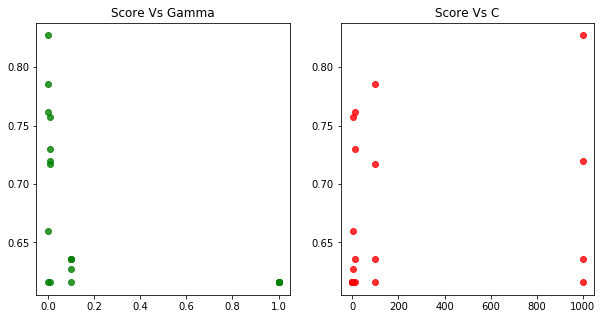

In [68]:
fig1, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(gammas,svm_scores,color='green',marker='o', linestyle='dashed',linewidth=0, markersize=6, alpha =0.8)
axes[1].plot(Cs,svm_scores,color='red', label = gammas,marker='o', linestyle='dashed',linewidth=0, markersize=6, alpha =0.8)

axes[0].set_title('Score Vs Gamma')
axes[1].set_title('Score Vs C')

plt.tight_layout

In [69]:
fig1.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\Hypertuned SVM.jpg')

In [70]:
grid_forest.cv_results_

{'mean_fit_time': array([0.00679612, 0.00899153, 0.01659141, 0.0133914 , 0.01439104,
        0.01137252, 0.02020149, 0.02321258, 0.03218198, 0.00599661,
        0.00812402, 0.00869713, 0.00937343, 0.01967144, 0.01654205,
        0.01938825, 0.02957983, 0.03818798, 0.00999141, 0.01079369,
        0.01818967, 0.01579013, 0.01432986, 0.02278357, 0.0191247 ,
        0.01870823, 0.03323455, 0.0065958 , 0.00819492, 0.01299233,
        0.0125926 , 0.01718059, 0.01369772, 0.01997776, 0.02214422,
        0.02106757, 0.00344572, 0.00625   , 0.011973  , 0.01299262,
        0.01559114, 0.01778946, 0.01958809, 0.02178674, 0.02138782,
        0.0055788 , 0.0075953 , 0.00987215, 0.01296525, 0.01818981,
        0.0209929 , 0.02018824, 0.02358603, 0.02278681, 0.00559669,
        0.00739946, 0.00980792, 0.01220055, 0.01419535, 0.01617312,
        0.02997789, 0.0331862 , 0.03098621, 0.0055923 , 0.01159434,
        0.01419311, 0.01279221, 0.01359181, 0.01958485, 0.03257904,
        0.03737845, 0.0269578 ,

In [71]:
grid_forest.cv_results_['mean_test_score'][1]

0.8371428571428572

In [72]:
criterion = []
forest_scores = []
feat_type = []
min_split = []
estimator = []

for i in range(grid_forest.cv_results_['mean_test_score'].shape[0]):
    
    forest_scores.append(grid_forest.cv_results_['mean_test_score'][i])
    criterion.append(grid_forest.cv_results_['params'][i]['criterion'])
    feat_type.append(grid_forest.cv_results_['params'][i]['max_features'])
    min_split.append(grid_forest.cv_results_['params'][i]['min_samples_split'])
    estimator.append(grid_forest.cv_results_['params'][i]['n_estimators'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

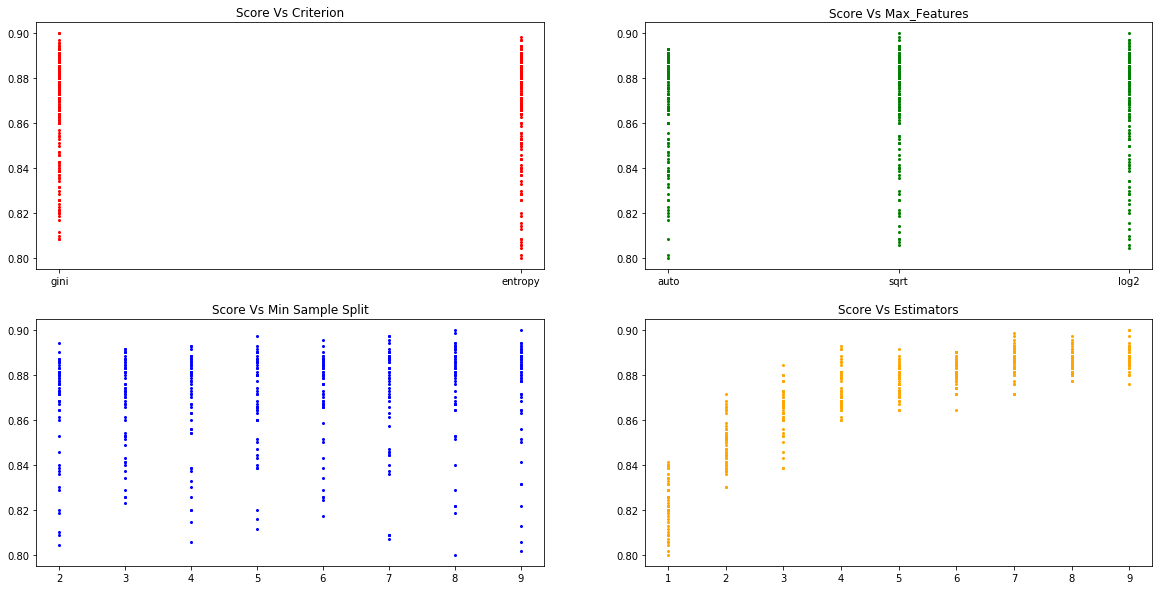

In [73]:
fig2, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(20,10))

axes[0][0].plot(criterion,forest_scores,color='red',marker='o', linestyle='dashed',linewidth=0, markersize=2)
axes[0][1].plot(feat_type,forest_scores,color='green',marker='o', linestyle='dashed',linewidth=0, markersize=2)
axes[1][0].plot(min_split,forest_scores,color='blue',marker='o', linestyle='dashed',linewidth=0, markersize=2)
axes[1][1].plot(estimator,forest_scores,color='orange',marker='o', linestyle='dashed',linewidth=0, markersize=2)

axes[0][0].set_title('Score Vs Criterion')
axes[0][1].set_title('Score Vs Max_Features')
axes[1][0].set_title('Score Vs Min Sample Split')
axes[1][1].set_title('Score Vs Estimators')

plt.tight_layout

In [74]:
fig2.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\Hypertuned Random Forest.jpg')